In [5]:
import os
from itertools import groupby
import json
import numpy as np
import pandas as pd
import plotnine

In [2]:
csv_path = "./rectangles_342.csv"

In [3]:
df = pd.read_csv(csv_path)

In [4]:
df

,Unnamed: 0,id,result,completed_by_id,lead_time,project_id,task_id
0,0,125649,"[{""id"": ""75KuRyt8pS"", ""type"": ""rectanglelabels...",35,435.146,342,497016
1,1,129405,"[{""id"": ""dCBSJcYsAY"", ""type"": ""rectanglelabels...",242,58.470,342,497016
2,2,116310,"[{""id"": ""NCUlgX1J_3"", ""type"": ""rectanglelabels...",2,1.770,342,497066
3,3,116311,"[{""id"": ""ZZ_M7RDrk0"", ""type"": ""rectanglelabels...",2,1.613,342,497068
4,4,116312,"[{""id"": ""KbpMvsyDny"", ""type"": ""rectanglelabels...",2,1.959,342,497070
...,...,...,...,...,...,...,...
708,708,130600,"[{""id"": ""Shs7HMU5ht"", ""type"": ""rectanglelabels...",200,115.429,342,497046
709,709,130614,"[{""id"": ""ZKj8ifmDZs"", ""type"": ""rectanglelabels...",200,132.421,342,497048
710,710,130620,"[{""id"": ""EhD6rm-KYP"", ""type"": ""rectanglelabels...",200,254.619,342,497050
711,711,130624,"[{""id"": ""B8nkrXm8FN"", ""type"": ""rectanglelabels...",200,65.670,342,497052


In [6]:
df_list = df.values.tolist()
df_list.sort(key=lambda x: x[6])
labels = []
for row in df_list:
    for anno in json.loads(row[2]):
        try:
            labels.append(anno["value"]["rectanglelabels"][0])
        except KeyError:
            print("Task id: {}, id: {}".format(row[5], row[1]))
labels = list(set(labels))
labels.sort()
annotations = {}
image_size = {}
for task_id, results in groupby(df_list, key=lambda x: x[6]):
    result = dict(list(map(lambda x: (x[3], json.loads(x[2])), list(results))))
    annotations[task_id] = result
    image_size[task_id] = (list(result.values())[0][0]["original_height"], list(result.values())[0][0]["original_width"])

In [7]:
annotations

{497002: {2: [{'id': '1HWNxKpH0n',
    'type': 'rectanglelabels',
    'value': {'x': 9.84375,
     'y': 51.875,
     'width': 16.09375,
     'height': 19.583333333333332,
     'rotation': 0,
     'rectanglelabels': ['chair']},
    'to_name': 'image',
    'from_name': 'label',
    'image_rotation': 0,
    'original_width': 640,
    'original_height': 480},
   {'id': 'E3vxPdXYDf',
    'type': 'rectanglelabels',
    'value': {'x': 46.71875,
     'y': 67.91666666666667,
     'width': 10.3125,
     'height': 13.333333333333334,
     'rotation': 0,
     'rectanglelabels': ['chair']},
    'to_name': 'image',
    'from_name': 'label',
    'image_rotation': 0,
    'original_width': 640,
    'original_height': 480},
   {'id': 'uACQh6TSDy',
    'type': 'rectanglelabels',
    'value': {'x': 58.125,
     'y': 53.541666666666664,
     'width': 12.96875,
     'height': 18.75,
     'rotation': 0,
     'rectanglelabels': ['chair']},
    'to_name': 'image',
    'from_name': 'label',
    'image_rotation'

In [12]:
bounding_boxes = []

for task_id in annotations:
    for uid in annotations[task_id]:
        for anno in annotations[task_id][uid]:
            try:
                orig_width = anno["original_width"]
                orig_height = anno["original_height"]
                x = anno["value"]["x"] /100
                y = anno["value"]["y"] /100
                width = anno["value"]["width"] /100
                height = anno["value"]["height"] / 100
                label = anno["value"]["rectanglelabels"][0]
                area = width * height

                bounding_boxes.append({"task_id": task_id, "uid": uid, "x": x, "y": y, "width": width, "height": height, "label": label, "area": area})
            except TypeError:
                continue


In [13]:
bounding_boxes

[{'task_id': 497002,
  'uid': 2,
  'x': 0.0984375,
  'y': 0.51875,
  'width': 0.1609375,
  'height': 0.19583333333333333,
  'label': 'chair',
  'area': 0.03151692708333333},
 {'task_id': 497002,
  'uid': 2,
  'x': 0.4671875,
  'y': 0.6791666666666667,
  'width': 0.103125,
  'height': 0.13333333333333333,
  'label': 'chair',
  'area': 0.013749999999999998},
 {'task_id': 497002,
  'uid': 2,
  'x': 0.58125,
  'y': 0.5354166666666667,
  'width': 0.1296875,
  'height': 0.1875,
  'label': 'chair',
  'area': 0.024316406250000002},
 {'task_id': 497002,
  'uid': 2,
  'x': 0.3953125,
  'y': 0.6041666666666666,
  'width': 0.5625,
  'height': 0.38958333333333334,
  'label': 'couch',
  'area': 0.219140625},
 {'task_id': 497002,
  'uid': 66,
  'x': 0.4609375,
  'y': 0.6729166666666667,
  'width': 0.103125,
  'height': 0.12291666666666666,
  'label': 'chair',
  'area': 0.012675781249999999},
 {'task_id': 497002,
  'uid': 66,
  'x': 0.45,
  'y': 0.6166666666666667,
  'width': 0.4734375,
  'height': 0.

In [14]:
bounding_boxes_df = pd.DataFrame(bounding_boxes)

In [15]:
bounding_boxes_df

,task_id,uid,x,y,width,height,label,area
0,497002,2,0.098437,0.518750,0.160938,0.195833,chair,0.031517
1,497002,2,0.467187,0.679167,0.103125,0.133333,chair,0.013750
2,497002,2,0.581250,0.535417,0.129688,0.187500,chair,0.024316
3,497002,2,0.395313,0.604167,0.562500,0.389583,couch,0.219141
4,497002,66,0.460938,0.672917,0.103125,0.122917,chair,0.012676
...,...,...,...,...,...,...,...,...
4133,497098,128,0.609375,0.000000,0.356250,0.314583,refrigerator,0.112070
4134,497098,128,0.867188,0.450000,0.131250,0.145833,cell phone,0.019141
4135,497098,128,0.003125,0.210417,0.056250,0.204167,chair,0.011484
4136,497098,128,0.751563,0.062500,0.248438,0.277083,chair,0.068838


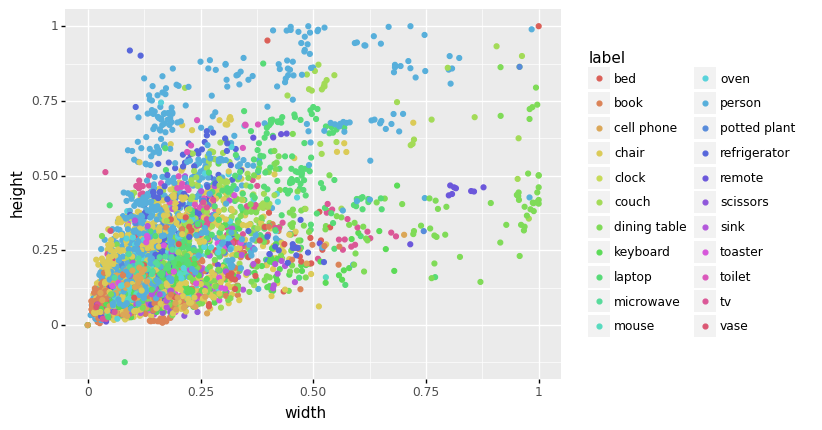

<ggplot: (-9223371902193448395)>

In [17]:
plotnine.ggplot(bounding_boxes_df) + plotnine.geom_point(mapping=plotnine.aes(x="width", y="height", color="label"))

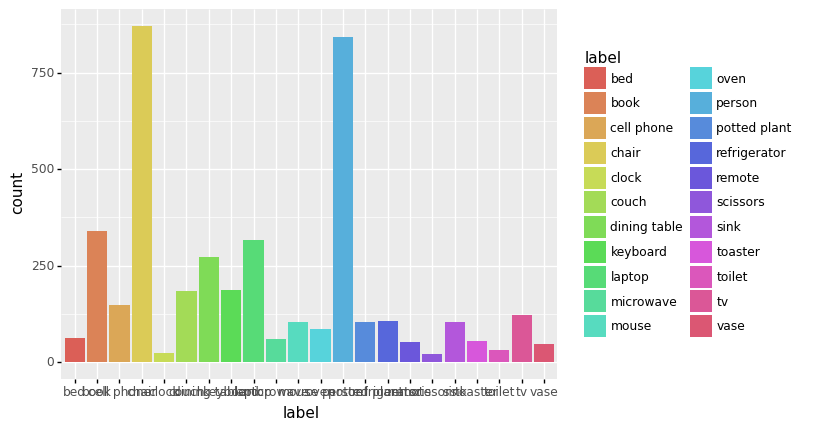

<ggplot: (134661682124)>

In [20]:
plotnine.ggplot(bounding_boxes_df) + plotnine.geom_bar(mapping=plotnine.aes(x="label", fill="label"))

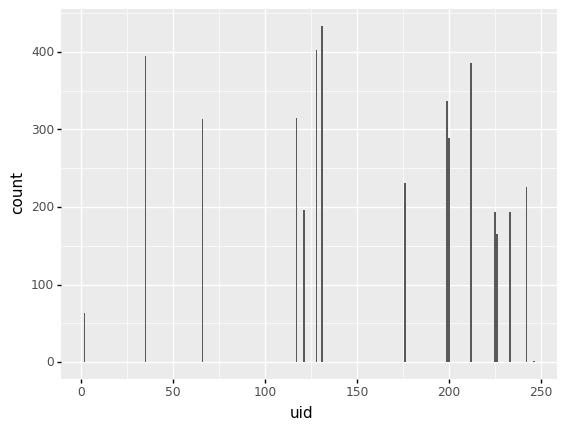

<ggplot: (-9223371902193087607)>

In [21]:
plotnine.ggplot(bounding_boxes_df) + plotnine.geom_bar(mapping=plotnine.aes(x="uid", fill="uid"))

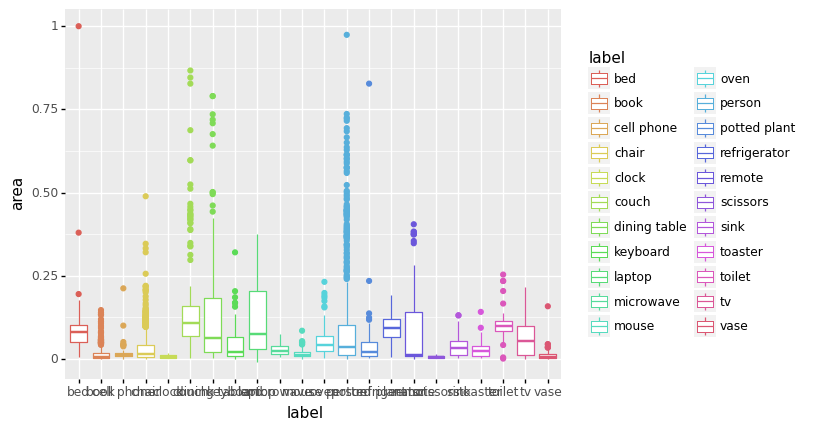

<ggplot: (-9223371902191579553)>

In [25]:
plotnine.ggplot(bounding_boxes_df) + plotnine.geom_boxplot(mapping=plotnine.aes(x="label", y="area", color="label"))